# Markov Chain

In [33]:
import numpy as np

## Application to PageRank

PageRank uses random walks to traverse a set of web pages. When the algorithm reaches a new webpage, it scans the document for all of its links, and then chooses a link at random as its next page.

This movement can be described using a model called a Markov chain (or process). A markov chain evaluates a set of events (in this case, movement across webpages) as depending only on its previous state. The crawler only considers the links from the current site in its decision for which site to go to next.

## Representation

Markov chains can be represented using the following elements:

Probability Vector - A vector of nonnegative entries that sum to 1.
Stochastic Matrix - A square matrix consisting of a set of probability vectors.

The state of the chain is represented by a probability vector, and its evolution from state to the next is represented by a stochastic matrix. To understand this in practice, lets look at an example.


We can represent the system with the following diagram:



\begin{split}\begin{array}{rcc}&\mbox{From CS}&\mbox{From IOE}&\mbox{From ME}\\\mbox{To CS}& .90&.02&.04\\\mbox{To IOE}&.06&.92&.03\\\mbox{To ME}&.04&.06&.93\end{array}\end{split}

The following is a probability vector representing the percentage of students remaining in CS, moving from CS to IO, or moving from CS to ME at the end of a given academic year.

\begin{split}V = \left[\begin{array}{rr}.90\\.06\\.04\end{array}\right].\end{split}

Its important to note that the sum of the entries in the vector is 1.

We can them apply the same procedure to the other two majors to construct the stochastic matrix $A$:

 \begin{bmatrix}.90 & .02 & .04  \\
 .06 & .92 & .03 \\
 .04 & .06 & .93
\end{bmatrix}

In [34]:
# The stochastic matrix
A = np.array([[.90, .02, .04], [.06, .92, .03], [.04, .06, .93]])


Its easy to see that by applying this transformation to the a data set representing the number of students in each major, we can get the number of students in each major after the end of the year. Lets say the number of students in each major at the end of the first year $N_1$ is represented by the following matrix:

 \begin{bmatrix}100\\50\\50\end{bmatrix}


In [39]:
# Distribution of students as of the first year
N1 = np.array([100, 50, 50])
# After normalization, the percentages are:
NORM_N1 = N1 / np.sum(N1)

We can normalize the matrix to get the following distribution:

\begin{bmatrix}0.5\\0.25\\0.25\end{bmatrix}

We can apply our transformation $A$ to the distribution $N_1$ to get the distribution $N_20$.

In [47]:
NORM_N1 = N1 / np.sum(N1)
# 20 Years
N_YEAR = 20
# Transition Matrix for 20 years
A2 = np.linalg.matrix_power(A, N_YEAR)
# Percentage of students in each major after 20 years
N20 = np.dot(A2, NORM_N1)
N20

array([0.25063319, 0.34209419, 0.40727262])

So $N_2$ represents the distribution of students at the end of the twentieth year:

 \begin{bmatrix}0.25\\0.35\\0.40\end{bmatrix}

Let's represent our markov chain as a node graph.

[2, 3, 4, 5, 6, 7]


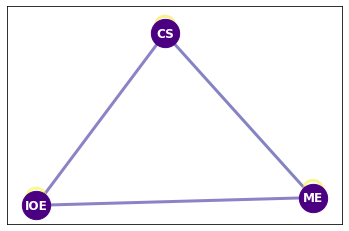

In [180]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edge(1,1)
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,1)
G.add_edge(2,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,2)
G.add_edge(3,3)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(
    G,
    pos=pos,
    node_size=800,
    nodelist=[1,2,3],
    node_color="indigo",
)
nx.draw_networkx_labels(G, pos=pos, labels={1:'CS', 2:'IOE', 3:'ME'}, font_color='white', font_weight='bold', font_family='poppins')

edge_colors = range(2, G.number_of_edges()+2)
print([color for color in edge_colors])
nx.draw_networkx_edges(
    G,
    pos=pos,
    node_size=800,
    # edge_color=edge_colors,
    edge_color=[
        .90,
        .04,
        .02,
        .95,
        .04,
        .92,
    ],
    edge_cmap=plt.cm.plasma,
    alpha=0.5,
    width=3,
)